# Diseño de amplificador
## VFA-CFA

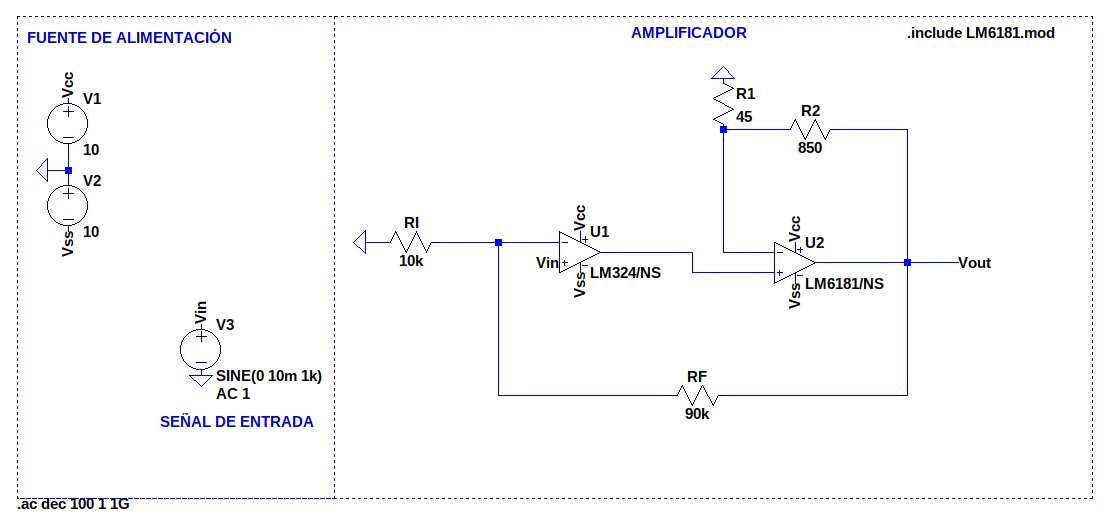

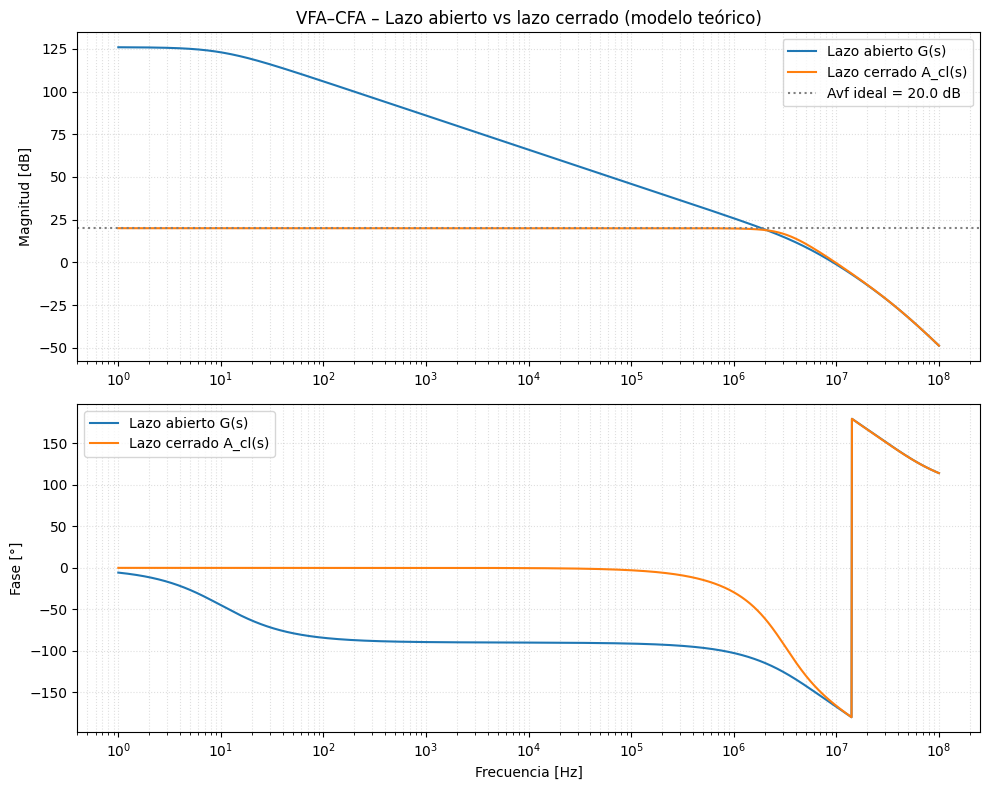

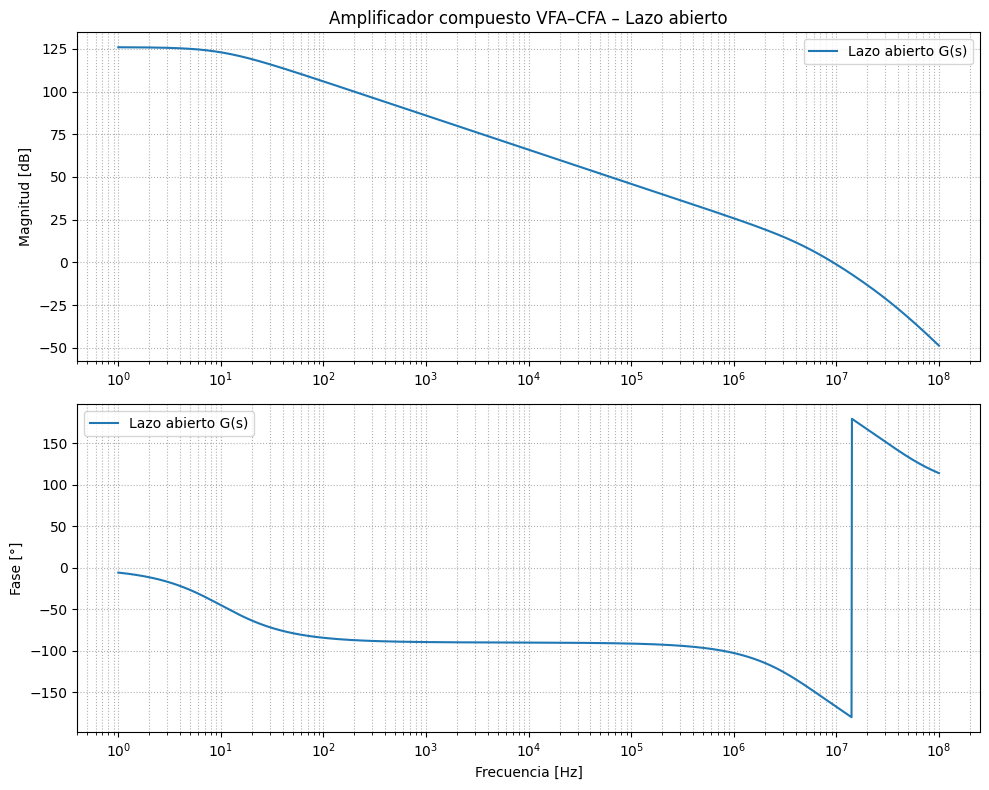

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
#  Modelo LM324 (VFA) - 2 polos
# ==========================
A0_vfa = 1e5       # ganancia DC (100 dB)
f1_vfa = 10        # Hz
f2_vfa = 5.06e6    # Hz
w1_vfa = 2 * np.pi * f1_vfa
w2_vfa = 2 * np.pi * f2_vfa

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)   # 1 Hz ... 100 MHz
w = 2 * np.pi * f
s = 1j * w

# Lazo abierto de UN LM324
A_vfa_ol = A0_vfa / ((1 + s / w1_vfa) * (1 + s / w2_vfa))

# ==========================
#  Modelo CFA (LM6181)
# ==========================
CT = 4.8e-12           # F
f_cfa_cl = 39e6       # ==========================
#  Gráfico Bode – lazo abierto vs lazo cerrado (solo teórico)
# ==========================
plt.figure(figsize=(10,8))

# Módulo
plt.subplot(2,1,1)
plt.semilogx(f, mag_ol, label='Lazo abierto G(s)')
plt.semilogx(f, mag_cl, label='Lazo cerrado A_cl(s)')
plt.axhline(20 * np.log10(Avf_ideal), color='gray', linestyle=':',
            label='Avf ideal = %.1f dB' % (20 * np.log10(Avf_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('VFA–CFA – Lazo abierto vs lazo cerrado (modelo teórico)')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

# Fase
plt.subplot(2,1,2)
plt.semilogx(f, phase_ol, label='Lazo abierto G(s)')
plt.semilogx(f, phase_cl, label='Lazo cerrado A_cl(s)')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show() # Hz (polo de lazo cerrado del CFA)
R2 = 850.0             # Ω
R1 = 45.0              # Ω
Avf2 = 1 + R2 / R1     # ganancia CFA (≈20)

w_cfa_cl = 2 * np.pi * f_cfa_cl

# Modelo simplificado: CFA EN LAZO CERRADO (1er orden)
A_cfa_cl = Avf2 / (1 + s / w_cfa_cl)

# ==========================
#  LAZO ABIERTO DEL COMPUESTO
# ==========================
G_comp = A_vfa_ol * A_cfa_cl

mag_ol = 20 * np.log10(np.abs(G_comp))
phase_ol = np.angle(G_comp, deg=True)

# ==========================
#  GRÁFICO – SOLO LAZO ABIERTO
# ==========================
plt.figure(figsize=(10,8))

# --- Magnitud ---
plt.subplot(2,1,1)
plt.semilogx(f, mag_ol, label='Lazo abierto G(s)')
plt.ylabel('Magnitud [dB]')
plt.title('Amplificador compuesto VFA–CFA – Lazo abierto')
plt.grid(True, which='both', ls=':')
plt.legend()

# --- Fase ---
plt.subplot(2,1,2)
plt.semilogx(f, phase_ol, label='Lazo abierto G(s)')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':')
plt.legend()

plt.tight_layout()
plt.show()



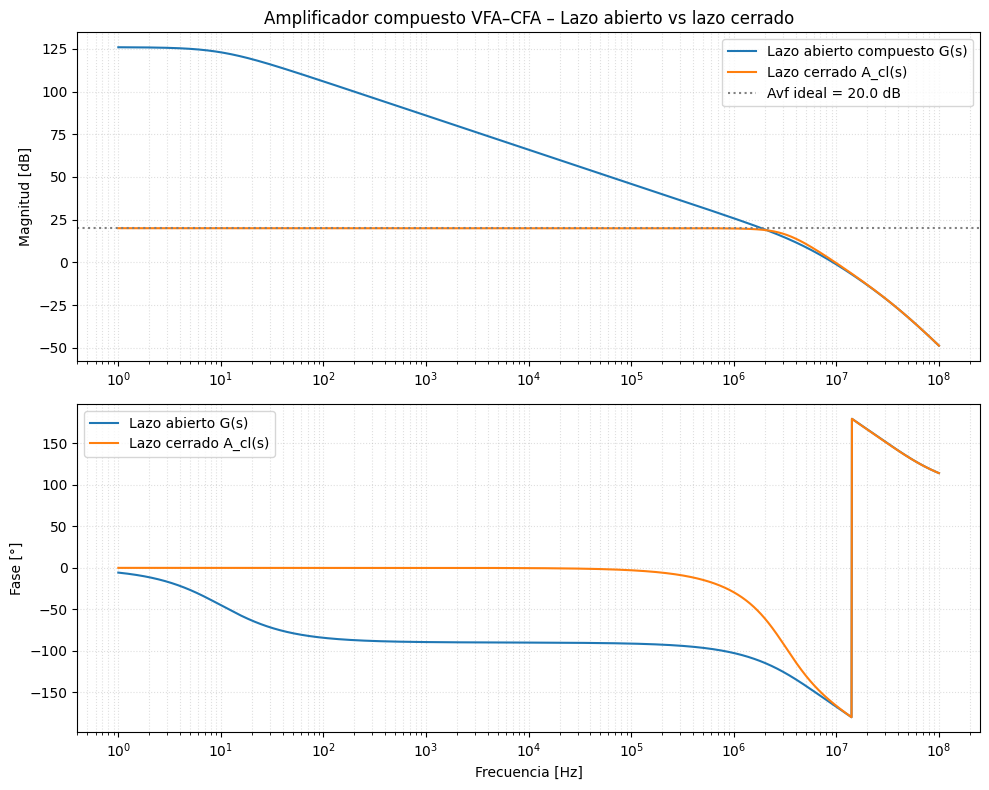

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1) Parámetros del LM324 (VFA)
# ==========================
A0_vfa = 1e5        # ganancia DC (100 dB)
f1_vfa = 10         # Hz (primer polo)
f2_vfa = 5.06e6     # Hz (segundo polo)
w1_vfa = 2*np.pi*f1_vfa
w2_vfa = 2*np.pi*f2_vfa

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)   # 1 Hz ... 100 MHz
w = 2*np.pi*f
s = 1j*w

# Ganancia a lazo abierto del LM324
A_vfa_ol = A0_vfa / ((1 + s/w1_vfa) * (1 + s/w2_vfa))

# ==========================
# 2) Diseño de la etapa CFA (LM6181)
# ==========================
CT = 4.8e-12          # F
f_cfa_cl = 39e6       # Hz, polo de lazo cerrado del CFA
Avf_global = 10       # ganancia global deseada (20 dB)
fg_deseada = 2e6      # Hz, ancho de banda global deseado

# R2 a partir de f_cfa_cl = 1/(2*pi*R2*CT)
R2 = 1 / (2*np.pi * CT * f_cfa_cl)
# Avf2 teórica (no la usamos después, pero queda para imprimir)
Avf2_teo = (Avf_global * fg_deseada) / (A0_vfa * f1_vfa)

# Valores prácticos usados en el circuito
R2_prac = 850.0   # Ω
R1_prac = 45.0    # Ω
Avf2_prac = 1 + R2_prac / R1_prac

# Modelo simplificado del CFA en lazo cerrado (1er orden)
w_cfa_cl = 2*np.pi * f_cfa_cl
A_cfa_cl = Avf2_prac / (1 + s / w_cfa_cl)

# ==========================
# 3) Realimentación global (no inversor)
# ==========================
Ri = 10e3
Rf = 90e3
beta_g = Ri / (Ri + Rf)              # factor de realimentación global
Avf_ideal = 1 + Rf/Ri

# Bloque de lazo compuesto (LO QUE LLAMAMOS "LAZO ABIERTO DEL COMPUESTO")
G_comp = A_vfa_ol * A_cfa_cl

# Ganancia a lazo cerrado del amplificador VFA–CFA
A_cl_comp = G_comp / (1 + beta_g * G_comp)

# Magnitud y fase lazo abierto (compuesto)
mag_ol = 20*np.log10(np.abs(G_comp))
phase_ol = np.angle(G_comp, deg=True)

# Magnitud y fase lazo cerrado (compuesto)
mag_cl = 20*np.log10(np.abs(A_cl_comp))
phase_cl = np.angle(A_cl_comp, deg=True)

# ==========================
# 4) Gráfico Bode: lazo abierto vs lazo cerrado
# ==========================
plt.figure(figsize=(10,8))

# --- Módulo ---
plt.subplot(2,1,1)
plt.semilogx(f, mag_ol, label='Lazo abierto compuesto G(s)')
plt.semilogx(f, mag_cl, label='Lazo cerrado A_cl(s)')
plt.axhline(20*np.log10(Avf_ideal), color='gray', linestyle=':',
            label='Avf ideal = %.1f dB' % (20*np.log10(Avf_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('Amplificador compuesto VFA–CFA – Lazo abierto vs lazo cerrado')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

# --- Fase ---
plt.subplot(2,1,2)
plt.semilogx(f, phase_ol, label='Lazo abierto G(s)')
plt.semilogx(f, phase_cl, label='Lazo cerrado A_cl(s)')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


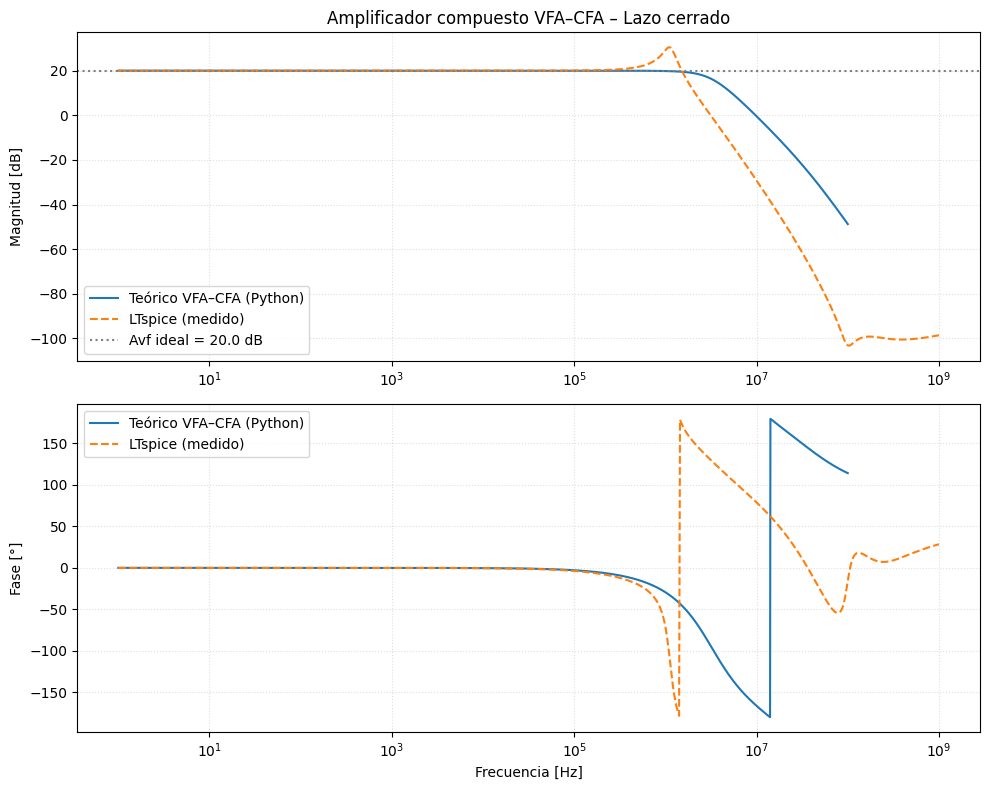

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
#  Modelo LM324 (VFA) - 2 polos
# ==========================
A0_vfa = 1e5       # ganancia DC (100 dB)
f1_vfa = 10        # Hz
f2_vfa = 5.06e6    # Hz
w1_vfa = 2 * np.pi * f1_vfa
w2_vfa = 2 * np.pi * f2_vfa

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)   # 1 Hz ... 100 MHz
w = 2 * np.pi * f
s = 1j * w

# Lazo abierto de UN LM324
A_vfa_ol = A0_vfa / ((1 + s / w1_vfa) * (1 + s / w2_vfa))

# ==========================
#  Modelo de la etapa CFA (LM6181)
# ==========================
CT = 4.8e-12          # F
f_cfa_cl = 39e6       # Hz, polo de lazo cerrado del CFA
R2_prac = 850.0       # Ω (R2)
R1_prac = 45.0        # Ω (R1)
Avf2 = 1 + R2_prac / R1_prac   # ganancia de la etapa CFA

w_cfa_cl = 2 * np.pi * f_cfa_cl

# Modelo simplificado: CFA en lazo cerrado (1er orden)
A_cfa_cl = Avf2 / (1 + s / w_cfa_cl)

# ==========================
#  Realimentación global (no inversor)
# ==========================
Ri = 10e3
Rf = 90e3
beta = Ri / (Ri + Rf)           # factor de realimentación global
Avf_ideal = 1 + Rf / Ri         # ganancia ideal (≈10)

# ==========================
#  Lazo abierto y lazo cerrado del compuesto
# ==========================
G_comp = A_vfa_ol * A_cfa_cl               # lazo abierto compuesto G(s)
A_cl_comp = G_comp / (1 + beta * G_comp)   # lazo cerrado A_cl(s)

# Lazo cerrado teórico
mag_cl = 20 * np.log10(np.abs(A_cl_comp))
phase_cl = np.angle(A_cl_comp, deg=True)

# Lazo abierto teórico (por si lo querés graficar)
mag_ol = 20 * np.log10(np.abs(G_comp))
phase_ol = np.angle(G_comp, deg=True)

# ==========================
#  Datos LTspice (formato: Freq   Re,Im)
# ==========================
freq_meas = []
re_meas = []
im_meas = []

# IMPORTANTE: encoding latin1 y ignore para evitar errores de decodificación
with open("amp_vfa_cfa.txt", "r", encoding="latin1", errors="ignore") as f_lt:
    # Si tu archivo tiene una línea de encabezado tipo "Freq.   V(vout)",
    # podés descomentar la siguiente línea:
    # next(f_lt)

    for line in f_lt:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        if len(parts) < 2:
            continue

        # ----- frecuencia -----
        try:
            f_val = float(parts[0])
        except ValueError:
            # si la primera línea es encabezado, la salteamos
            continue

        # ----- columna "Re,Im" -----
        comp_str = parts[1].strip('()')   # por si vienen paréntesis
        try:
            re_str, im_str = comp_str.split(',')
        except ValueError:
            # si no se puede separar en 2, ignoramos la línea
            continue

        re_val = float(re_str)
        im_val = float(im_str)

        freq_meas.append(f_val)
        re_meas.append(re_val)
        im_meas.append(im_val)

freq_meas = np.array(freq_meas)
re_meas = np.array(re_meas)
im_meas = np.array(im_meas)

vout_c = re_meas + 1j * im_meas
mag_meas = 20 * np.log10(np.abs(vout_c))
phase_meas = np.angle(vout_c, deg=True)

# ==========================
#  Gráfico Bode – lazo cerrado (teoría vs LTspice)
# ==========================
plt.figure(figsize=(10,8))

# Módulo
plt.subplot(2, 1, 1)
plt.semilogx(f, mag_cl, label='Teórico VFA–CFA (Python)')
plt.semilogx(freq_meas, mag_meas, '--', label='LTspice (medido)')
plt.axhline(20 * np.log10(Avf_ideal), color='gray', linestyle=':',
            label='Avf ideal = %.1f dB' % (20 * np.log10(Avf_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('Amplificador compuesto VFA–CFA – Lazo cerrado')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(f, phase_cl, label='Teórico VFA–CFA (Python)')
plt.semilogx(freq_meas, phase_meas, '--', label='LTspice (medido)')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()

